In [102]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [103]:
import os
import pickle
import numpy as np

def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        Y = np.array(Y)
    return X, Y

def load_cifar10(data_dir):
    xs = []
    ys = []
    for b in range(1, 6):
        batch_filename = os.path.join(data_dir, 'data_batch_%d' % b)
        X, Y = load_cifar10_batch(batch_filename)
        xs.append(X)
        ys.append(Y)
    X_train = np.concatenate(xs)
    Y_train = np.concatenate(ys)
    X_test, Y_test = load_cifar10_batch(os.path.join(data_dir, 'test_batch'))
    return X_train, Y_train, X_test, Y_test

data_dir = 'DataScience/image_recognition/cifar-10-batches-py'

X_train, Y_train, X_test, Y_test = load_cifar10(data_dir)

train_images, test_images = X_train / 255.0, X_test / 255.0





In [104]:
print("Training images shape:", train_images.shape)
print("Training labels shape:", Y_train.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", Y_test.shape)


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Testing images shape: (10000, 32, 32, 3)
Testing labels shape: (10000,)


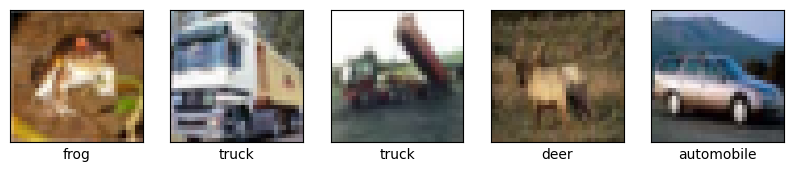

In [105]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[Y_train[i]])
plt.show()

In [112]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Add softmax activation for the final layer

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_raw = model.fit(train_images, Y_train, epochs=10, validation_data=(test_images, Y_test))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.0935 - loss: 2.3082 - val_accuracy: 0.1000 - val_loss: 2.3546
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1385 - loss: 2.2984 - val_accuracy: 0.1000 - val_loss: 2.3279
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1628 - loss: 2.2614 - val_accuracy: 0.1000 - val_loss: 2.2891
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1628 - loss: 2.2484 - val_accuracy: 0.2000 - val_loss: 2.2685
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1075 - loss: 2.2592 - val_accuracy: 0.2000 - val_loss: 2.2660
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1023 - loss: 2.2606 - val_accuracy: 0.2000 - val_loss: 2.2818
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1207 - loss: 2.2256 - val_accuracy: 0.0500 - val_loss: 2.3040
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2828 - loss: 2.2286 - val_accuracy: 0.1000 - val_loss: 2.3170


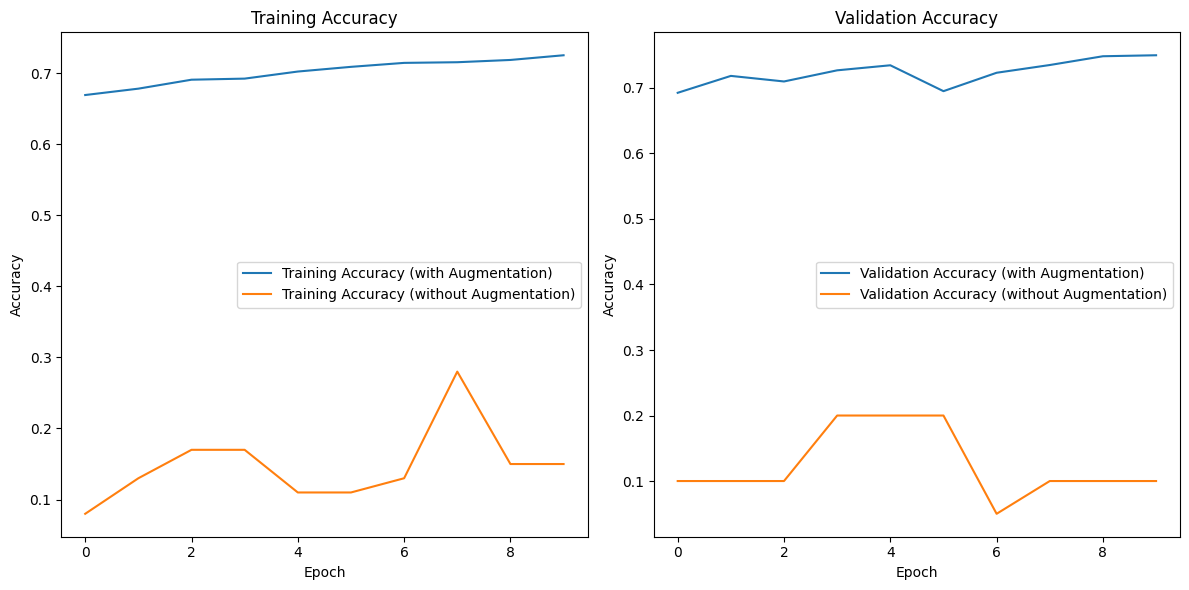

In [119]:
import matplotlib.pyplot as plt

# Plotting the accuracy across epochs for both scenarios
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy (with Augmentation)')
plt.plot(history_raw.history['accuracy'], label='Training Accuracy (without Augmentation)')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy (with Augmentation)')
plt.plot(history_raw.history['val_accuracy'], label='Validation Accuracy (without Augmentation)')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [120]:
test_loss, test_acc = model.evaluate(test_images, Y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Save the model
model.save('cifar10_cnn_model.keras')

predictions = model.predict(test_images)



1/1 - 0s - 67ms/step - accuracy: 0.1000 - loss: 2.3123

Test accuracy: 0.10000000149011612
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


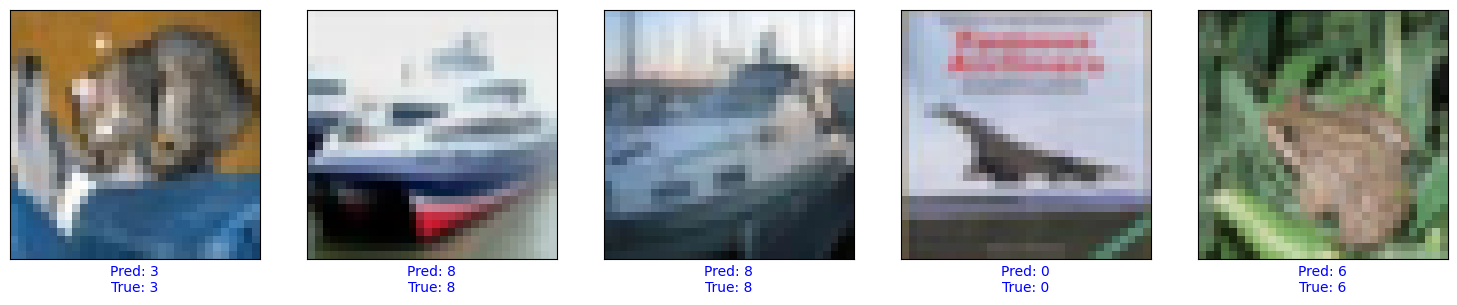

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Plot the first 5 test images with their predicted labels and true labels
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = Y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes for test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion Matrix:
[[805   8  49  14  14   5   9  19  43  34]
 [ 24 793  10   8   4   4   6  14  17 120]
 [ 78   7 584  55  99  50  46  55   9  17]
 [ 24  10  75 515  76 139  54  65  13  29]
 [ 19   3  61  41 702  23  38 101   8   4]
 [ 10   4  62 165  56 587  19  82   8   7]
 [  6   6  65  55  57  18 755  21   3  14]
 [ 16   1  28  25  66  35   1 814   3  11]
 [104  17  17  19   7   6   2  14 773  41]
 [ 34  38  13  11   5   2   3  24  23 847]]

Classification Report:
              precision    recall  f1-score   support

    airplane       0.72      0.81      0.76      1000
  automobile       0.89      0.79      0.84      1000
        bird       0.61      0.58      0.59      1000
         cat       0.57      0.52      0.54      1000
        deer       0.65      0.70      0.67      1000
         dog       0.68      0.59      0.63      1000
        frog       0.81      0.76      0.78      1000
       horse       0.67      0.81      0.74      1000

In [124]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define and compile the second model
second_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

second_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Create a data generator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit the data generator on the training data
datagen.fit(train_images)

# Train the second model with data augmentation
history_augmented = second_model.fit(datagen.flow(train_images, Y_train, batch_size=32),
                                     epochs=10, validation_data=(test_images, Y_test))

# Make predictions with the second model on test data
predictions_second_model = second_model.predict(test_images)




Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_39" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 32, 32, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
test_loss2, test_acc2 = second_model.evaluate(test_images, Y_test, verbose=2)
print("\nTest accuracy:", test_acc2)

predictions2 = second_model.predict(test_images)


In [ ]:

# Example: Plotting first 5 test images with predictions from second model
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_second_model[i])
    true_label = Y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)

plt.tight_layout()
plt.show()
